<a href="https://colab.research.google.com/github/mangnez/SrutiSusarla-EDA-INCOME/blob/main/SrutiSusarla_INCOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('/content/income.csv')
df

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,-10.000),F,Single,14-17,Grade 8 or less,Sales Worker,10+ years,Not Married,Three,Two,Family,House,White,English
8989,[10.000-15.000),M,Single,18-24,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Four,NaN,Family,House,White,English
8990,-10.000),F,Single,14-17,Grades 9 to 11,Professional/Managerial,10+ years,Not Married,Three,Two,Family,House,White,English
8991,[20.000-25.000),M,Married,55-64,1 to 3 years of college,Factory Worker/Laborer/Driver,10+ years,Yes,Three,One,Rent,Apartment,White,English


In [61]:
print(df.head(3))
print(df.tail(3))

    INCOME SEX MARITAL.STATUS  AGE                EDUCATION  \
0  75000.0   F        Married  NaN  1 to 3 years of college   
1  75000.0   M        Married  NaN         College graduate   
2  75000.0   F        Married  NaN         College graduate   

                OCCUPATION       AREA DUAL.INCOMES HOUSEHOLD.SIZE UNDER18  \
0                Homemaker  10+ years           No          Three     One   
1                Homemaker  10+ years           No           Five     Two   
2  Professional/Managerial  10+ years          Yes          Three     One   

  HOUSEHOLDER  HOME.TYPE ETHNIC.CLASS LANGUAGE  
0         Own      House        White  English  
1         Own      House        White  English  
2        Rent  Apartment        White  English  
            INCOME SEX MARITAL.STATUS  AGE                EDUCATION  \
8990  35295.943709   F         Single  NaN           Grades 9 to 11   
8991  20000.000000   M        Married  NaN  1 to 3 years of college   
8992  30000.000000   M       

In [52]:
print(df.dtypes)

INCOME            float64
SEX                object
MARITAL.STATUS     object
AGE               float64
EDUCATION          object
OCCUPATION         object
AREA               object
DUAL.INCOMES       object
HOUSEHOLD.SIZE     object
UNDER18            object
HOUSEHOLDER        object
HOME.TYPE          object
ETHNIC.CLASS       object
LANGUAGE           object
dtype: object


In [53]:
print(df.describe(include='all'))  # include='all' gives statistics for all types of data

# Check for missing values
print(pd.isna(df).any())

              INCOME   SEX MARITAL.STATUS  AGE                EDUCATION  \
count    8993.000000  8993           8833  0.0                     8907   
unique           NaN     2              5  NaN                        6   
top              NaN     F         Single  NaN  1 to 3 years of college   
freq             NaN  4918           3654  NaN                     3066   
mean    35295.943709   NaN            NaN  NaN                      NaN   
std     17539.800320   NaN            NaN  NaN                      NaN   
min     10000.000000   NaN            NaN  NaN                      NaN   
25%     20000.000000   NaN            NaN  NaN                      NaN   
50%     35295.943709   NaN            NaN  NaN                      NaN   
75%     40000.000000   NaN            NaN  NaN                      NaN   
max     75000.000000   NaN            NaN  NaN                      NaN   

                     OCCUPATION       AREA DUAL.INCOMES HOUSEHOLD.SIZE  \
count                    

In [55]:
print(df['INCOME'].isnull().sum())

# If any missing values are found, replace them with the mean or median
income_mean = df['INCOME'].mean()
df['INCOME'].fillna(income_mean, inplace=True)

# Verify the final result
print(df['INCOME'].head(10))

0
0    75000.000000
1    75000.000000
2    75000.000000
3    35295.943709
4    35295.943709
5    50000.000000
6    35295.943709
7    30000.000000
8    10000.000000
9    20000.000000
Name: INCOME, dtype: float64


In [56]:
print(df['AGE'].isnull().sum())

# If any missing values are found, replace them with the mean or median
age_mean = df['AGE'].mean()
df['AGE'].fillna(age_mean, inplace=True)
print(df['AGE'].head(10))

8993
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: AGE, dtype: float64


In [58]:
print(df['INCOME'].value_counts())

# Replacing missing or placeholder values (e.g., '?') with the most frequent value (mode)
income_mode = df['INCOME'].mode()[0]
df['INCOME'] = df['INCOME'].replace('?', income_mode)

print(df['INCOME'].head(10))

INCOME
35295.943709    1745
50000.000000    1308
30000.000000    1110
40000.000000     969
75000.000000     884
20000.000000     813
10000.000000     775
25000.000000     722
15000.000000     667
Name: count, dtype: int64
0    75000.000000
1    75000.000000
2    75000.000000
3    35295.943709
4    35295.943709
5    50000.000000
6    35295.943709
7    30000.000000
8    10000.000000
9    20000.000000
Name: INCOME, dtype: float64


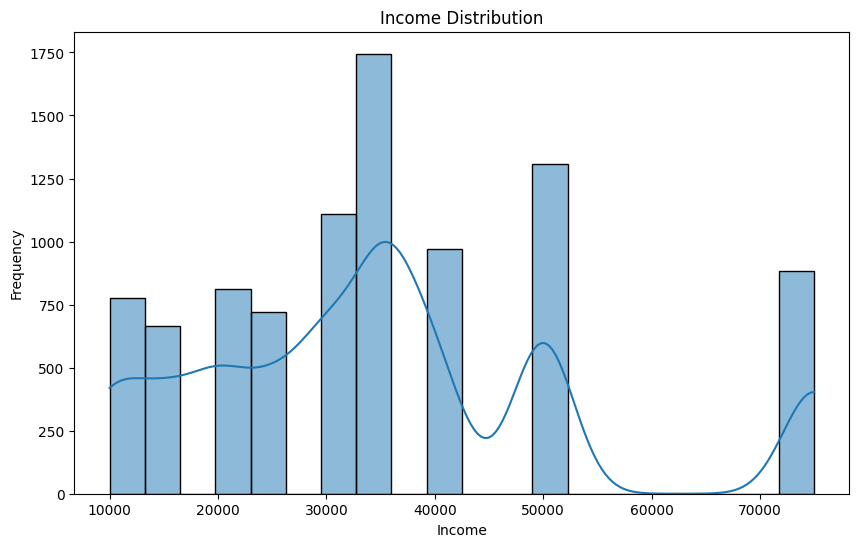

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of income
plt.figure(figsize=(10, 6))
sns.histplot(df['INCOME'], kde=True, bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [68]:
valid_income = df['INCOME'].dropna()

# Calculate mean, median, and mode
mean_income = valid_income.mean()
median_income = valid_income.median()
mode_income = valid_income.mode()[0]

print("Mean Income:", mean_income)
print("Median Income:", median_income)
print("Mode Income:", mode_income)

Mean Income: 35295.94370860927
Median Income: 35295.94370860927
Mode Income: 35295.94370860927


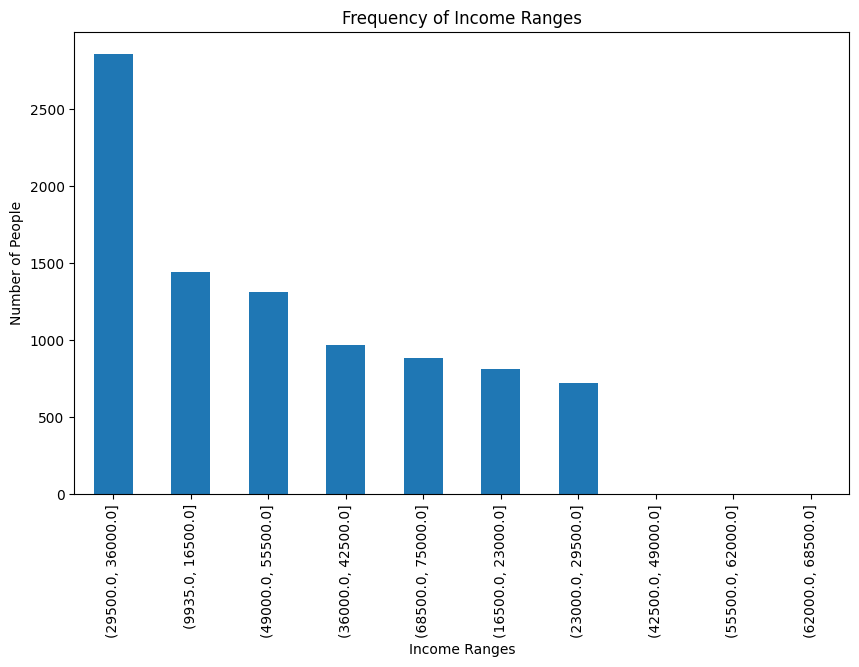

In [69]:
income_bins = pd.cut(df['INCOME'], bins=10)  # Divide the income column into 10 equal-sized bins

# Plot the frequency of income ranges
income_bins.value_counts().nlargest(10).plot(kind='bar', figsize=(10,6))

# Add titles and labels
plt.title("Frequency of Income Ranges")
plt.ylabel('Number of People')
plt.xlabel('Income Ranges')
plt.show()

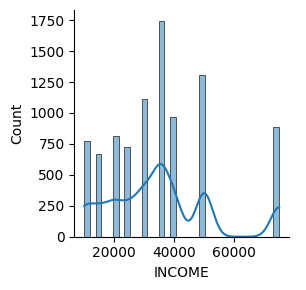

In [70]:
sns.FacetGrid(df).map(sns.histplot, "INCOME", kde=True).add_legend()

# Show the plot
plt.show()

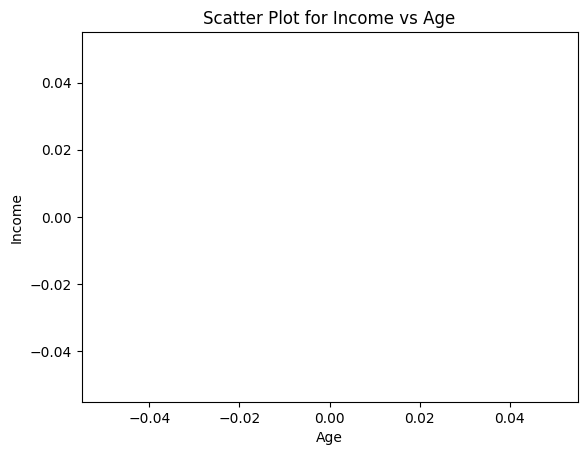

In [71]:
plt.scatter(df["AGE"], df["INCOME"])
plt.title("Scatter Plot for Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()